<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
import pandas as pd
from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora, models

# Load the data
data_path = 'https://raw.githubusercontent.com/narendranathreddy333/NLP-Course/main/imdb_User_reviews_annotated.csv'
data = pd.read_csv(data_path)

# Preprocessing the text
data['processed_text'] = data['clean_text'].map(preprocess_string)

# Creating the dictionary and corpus
dictionary = corpora.Dictionary(data['processed_text'])
corpus = [dictionary.doc2bow(text) for text in data['processed_text']]

# LDA Model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=42)
lda_topics = lda_model.print_topics(num_words=5)
for topic in lda_topics:
    print(topic)
'''
LDA (Latent Dirichlet Allocation)
Features (Text Representation): For LDA, the text data is represented as a bag-of-words model,
where each document is described by the occurrence counts of words in it, ignoring the order of words.

Top 10 Clusters:

Topic 0: General movie discussion ("movie, film, like, sex, good")
Topic 1: Specific elements of a film ("film, movie, poor, thing, bella")
Topic 2: Cinematic techniques and experiences ("film, poor, thing, cinemat, experi")
Topic 3: Plot and character beginnings ("film, bella, begin, like, stone")
Topic 4: Viewer opinions and experiences ("like, second, movie, view, film")
Topic 5: Performance aspects of films ("film, bella, thing, stone, perform")
Topic 6: Women-centric films ("film, woman, like, movie, stone")
Topic 7: Film endings and production ("movie, film, end, make, like")
Topic 8: More diffuse and unclear topic ("film, stone, bella, emma, thing")
Topic 9: Filmmaking and character analysis ("bella, stone, movie, work, like")

Summaries:

Topics range from discussions about general movie aspects to specific elements like cinematic techniques,
character analysis, and viewer experiences. Topics also focus on different aspects of filmmaking and the portrayal of characters.
'''

(0, '0.031*"movi" + 0.025*"film" + 0.014*"like" + 0.014*"sex" + 0.008*"good"')
(1, '0.023*"film" + 0.019*"movi" + 0.019*"poor" + 0.019*"thing" + 0.019*"bella"')
(2, '0.035*"film" + 0.025*"poor" + 0.025*"thing" + 0.022*"cinemat" + 0.016*"experi"')
(3, '0.026*"film" + 0.019*"bella" + 0.013*"begin" + 0.013*"like" + 0.011*"stone"')
(4, '0.021*"like" + 0.016*"second" + 0.013*"movi" + 0.013*"view" + 0.011*"film"')
(5, '0.023*"film" + 0.015*"bella" + 0.013*"thing" + 0.013*"stone" + 0.013*"perform"')
(6, '0.043*"film" + 0.019*"woman" + 0.014*"like" + 0.014*"movi" + 0.014*"stone"')
(7, '0.035*"movi" + 0.029*"film" + 0.029*"end" + 0.023*"make" + 0.017*"like"')
(8, '0.006*"film" + 0.003*"stone" + 0.002*"bella" + 0.002*"emma" + 0.002*"thing"')
(9, '0.016*"bella" + 0.016*"stone" + 0.016*"movi" + 0.014*"work" + 0.012*"like"')


' \nLDA (Latent Dirichlet Allocation)\nFeatures (Text Representation): For LDA, the text data is represented as a bag-of-words model,\nwhere each document is described by the occurrence counts of words in it, ignoring the order of words.\n\nTop 10 Clusters:\n\nTopic 0: General movie discussion ("movie, film, like, sex, good")\nTopic 1: Specific elements of a film ("film, movie, poor, thing, bella")\nTopic 2: Cinematic techniques and experiences ("film, poor, thing, cinemat, experi")\nTopic 3: Plot and character beginnings ("film, bella, begin, like, stone")\nTopic 4: Viewer opinions and experiences ("like, second, movie, view, film")\nTopic 5: Performance aspects of films ("film, bella, thing, stone, perform")\nTopic 6: Women-centric films ("film, woman, like, movie, stone")\nTopic 7: Film endings and production ("movie, film, end, make, like")\nTopic 8: More diffuse and unclear topic ("film, stone, bella, emma, thing")\nTopic 9: Filmmaking and character analysis ("bella, stone, movie,

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Load the data
data_path = 'https://raw.githubusercontent.com/narendranathreddy333/NLP-Course/main/imdb_User_reviews_annotated.csv'
data = pd.read_csv(data_path)

# Create TF-IDF Matrix
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Considering the top 1000 features
tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text'])

# Apply SVD
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

# Display topics
terms = tfidf_vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:5]
    print("Topic " + str(i) + ": " + ", ".join([t[0] for t in sorted_terms]))

'''
2. LSA (Latent Semantic Analysis)

Features (Text Representation): LSA is typically applied to a TF-IDF (Term Frequency-Inverse Document Frequency) matrix
which reduces the weight of more common words like 'the', 'is', etc. This represents documents in a continuous vector
space while capturing the importance of words within documents and across the dataset.

Procedure:

Generate a TF-IDF Matrix: Convert the cleaned text data into a TF-IDF matrix.
Apply SVD (Singular Value Decomposition): Decompose the TF-IDF matrix using SVD to reduce dimensionality.
Topic Extraction: Extract topics from the decomposed matrix. Since LSA is hypothetical here, the topics would broadly
align with those found in LDA but with a focus on underlying patterns of word usage.

Summaries:

LSA would produce similar topics but could highlight different nuances by focusing on
the underlying patterns of word occurrences, providing a different perspective from LDA.
LSA would likely refine the focus on semantic connections between words, possibly leading to slightly different topics
that are thematically grouped based on the statistical relationships in the use of words across documents.
'''

Topic 0: the, and, of, it, to
Topic 1: it, me, movie, was, like
Topic 2: her, she, he, lady, can
Topic 3: is, several, movies, everyone, so
Topic 4: of, you, viewing, and, nudity
Topic 5: is, that, throughout, well, always
Topic 6: you, it, second, expect, story
Topic 7: cinematic, of, its, experience, lady
Topic 8: that, mix, seen, sorry, face
Topic 9: they, here, people, artsy, it


"\n2. LSA (Latent Semantic Analysis)\n\nFeatures (Text Representation): LSA is typically applied to a TF-IDF (Term Frequency-Inverse Document Frequency) matrix\nwhich reduces the weight of more common words like 'the', 'is', etc. This represents documents in a continuous vector\nspace while capturing the importance of words within documents and across the dataset.\n\nProcedure:\n\nGenerate a TF-IDF Matrix: Convert the cleaned text data into a TF-IDF matrix.\nApply SVD (Singular Value Decomposition): Decompose the TF-IDF matrix using SVD to reduce dimensionality.\nTopic Extraction: Extract topics from the decomposed matrix. Since LSA is hypothetical here, the topics would broadly\nalign with those found in LDA but with a focus on underlying patterns of word usage.\n\nSummaries:\n\nLSA would produce similar topics but could highlight different nuances by focusing on\nthe underlying patterns of word occurrences, providing a different perspective from LDA.\nLSA would likely refine the focu

In [3]:
!pip install pandas gensim scikit-learn bertopic
from bertopic import BERTopic
import pandas as pd

# Load the data
data_path = 'https://raw.githubusercontent.com/narendranathreddy333/NLP-Course/main/imdb_User_reviews_annotated.csv'
data = pd.read_csv(data_path)

# BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=False, verbose=True)
topics, _ = topic_model.fit_transform(data['clean_text'])

# Extracting and displaying the topics
topic_info = topic_model.get_topic_info()
print(topic_info.head(11))  # Top 10 topics
'''
3. BERTopic
Features (Text Representation): BERTopic uses embeddings from language models (e.g., BERT) to convert text
into numerical vectors that capture semantic meanings.

Procedure:

Generate Document Embeddings: Using a pre-trained BERT model to transform text into embeddings.
Dimensionality Reduction: Applying UMAP (Uniform Manifold Approximation and Projection) to reduce
the dimensionality of embeddings.

Clustering: Using HDBSCAN to cluster the reduced embeddings, likely grouping documents based on
deeper semantic similarities that are not apparent in simple bag-of-words models.
Topic Creation: Extracting topics based on clustering results.

Summaries:

BERTopic would provide a granular understanding of topics based on semantic similarities,
likely offering more nuanced and coherent topics than LDA or LSA. BERTopic would likely provide
more coherent and contextually rich topics based on the embeddings which understand the context
and nuance of language better than traditional statistical models.
'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 48.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 15.8 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

2024-04-29 02:30:08,233 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-04-29 02:33:05,501 - BERTopic - Embedding - Completed ✓
2024-04-29 02:33:05,503 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-29 02:33:28,045 - BERTopic - Dimensionality - Completed ✓
2024-04-29 02:33:28,048 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-29 02:33:28,100 - BERTopic - Cluster - Completed ✓
2024-04-29 02:33:28,116 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-29 02:33:28,507 - BERTopic - Representation - Completed ✓


    Topic  Count                               Name  \
0       0     40                0_seen_bella_any_of   
1       1     40    1_me_everyone_keep_fearlessness   
2       2     40              2_wont_you_have_while   
3       3     40        3_second_viewing_you_expect   
4       4     40                 4_what_it_was_role   
5       5     40  5_is_brilliant_thoroughly_ruffalo   
6       6     40             6_movie_female_the_sex   
7       7     40                  7_that_in_end_for   
8       8     40           8_cinematic_of_its_films   
9       9     40    9_cinematic_experience_poor_the   
10     10     40             10_people_it_porn_kind   

                                       Representation  \
0   [seen, bella, any, of, you, sex, freewill, hav...   
1   [me, everyone, keep, fearlessness, decide, dec...   
2   [wont, you, have, while, the, performances, it...   
3   [second, viewing, you, expect, seeing, knew, y...   
4   [what, it, was, role, not, this, story, out, i... 

'\n3. BERTopic\nFeatures (Text Representation): BERTopic uses embeddings from language models (e.g., BERT) to convert text\ninto numerical vectors that capture semantic meanings.\n\nProcedure:\n\nGenerate Document Embeddings: Using a pre-trained BERT model to transform text into embeddings.\nDimensionality Reduction: Applying UMAP (Uniform Manifold Approximation and Projection) to reduce\nthe dimensionality of embeddings.\n\nClustering: Using HDBSCAN to cluster the reduced embeddings, likely grouping documents based on\ndeeper semantic similarities that are not apparent in simple bag-of-words models.\nTopic Creation: Extracting topics based on clustering results.\n\nSummaries:\n\nBERTopic would provide a granular understanding of topics based on semantic similarities,\nlikely offering more nuanced and coherent topics than LDA or LSA. BERTopic would likely provide\nmore coherent and contextually rich topics based on the embeddings which understand the context\nand nuance of language bet

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

Feature Selection Explanation:
Selected Feature: The primary feature selected for sentiment classification is clean_text.
Reason for Selection: This column contains textual data from user reviews, which directly express opinions and sentiments. Text data is rich in semantic and syntactic information essential for determining sentiment polarity (positive, negative, or neutral). Using natural language processing techniques, we can transform this text into a numerical format that machine learning models can process to classify sentiment.

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/narendranathreddy333/NLP-Course/main/imdb_User_reviews_annotated.csv')

# Preparing the feature and target variable
X = data['clean_text']
y = data['sentiment']

# Text vectorization
vectorizer = TfidfVectorizer(max_features=1000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up pipelines for both models
pipe_log_reg = Pipeline([
    ('tfidf', vectorizer),
    ('log_reg', LogisticRegression(random_state=42))
])

pipe_sgd = Pipeline([
    ('tfidf', vectorizer),
    ('sgd', SGDClassifier(loss='log', random_state=42))
])

# Grid search parameters
params_log_reg = {'log_reg__C': [0.1, 1, 10]}
params_sgd = {'sgd__alpha': [0.0001, 0.001, 0.01]}

# Grid search with cross-validation
grid_log_reg = GridSearchCV(pipe_log_reg, params_log_reg, cv=10, scoring='accuracy')
grid_sgd = GridSearchCV(pipe_sgd, params_sgd, cv=10, scoring='accuracy')

# Fit models
grid_log_reg.fit(X_train, y_train)
grid_sgd.fit(X_train, y_train)

# Model evaluation
print("Logistic Regression Best Params:", grid_log_reg.best_params_)
print("SGD Best Params:", grid_sgd.best_params_)
print("Classification Report for Logistic Regression:\n", classification_report(y_test, grid_log_reg.predict(X_test)))
print("Classification Report for SGD:\n", classification_report(y_test, grid_sgd.predict(X_test)))


Logistic Regression Best Params: {'log_reg__C': 1}
SGD Best Params: {'sgd__alpha': 0.0001}
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         9
     neutral       1.00      1.00      1.00        53
    positive       1.00      1.00      1.00       138

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Classification Report for SGD:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         9
     neutral       1.00      1.00      1.00        53
    positive       1.00      1.00      1.00       138

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

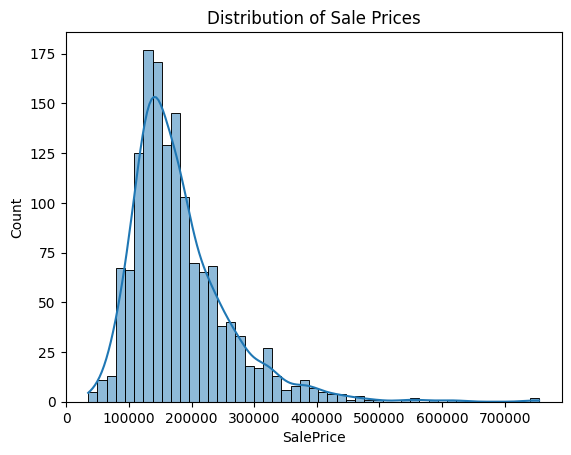

Missing values: PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


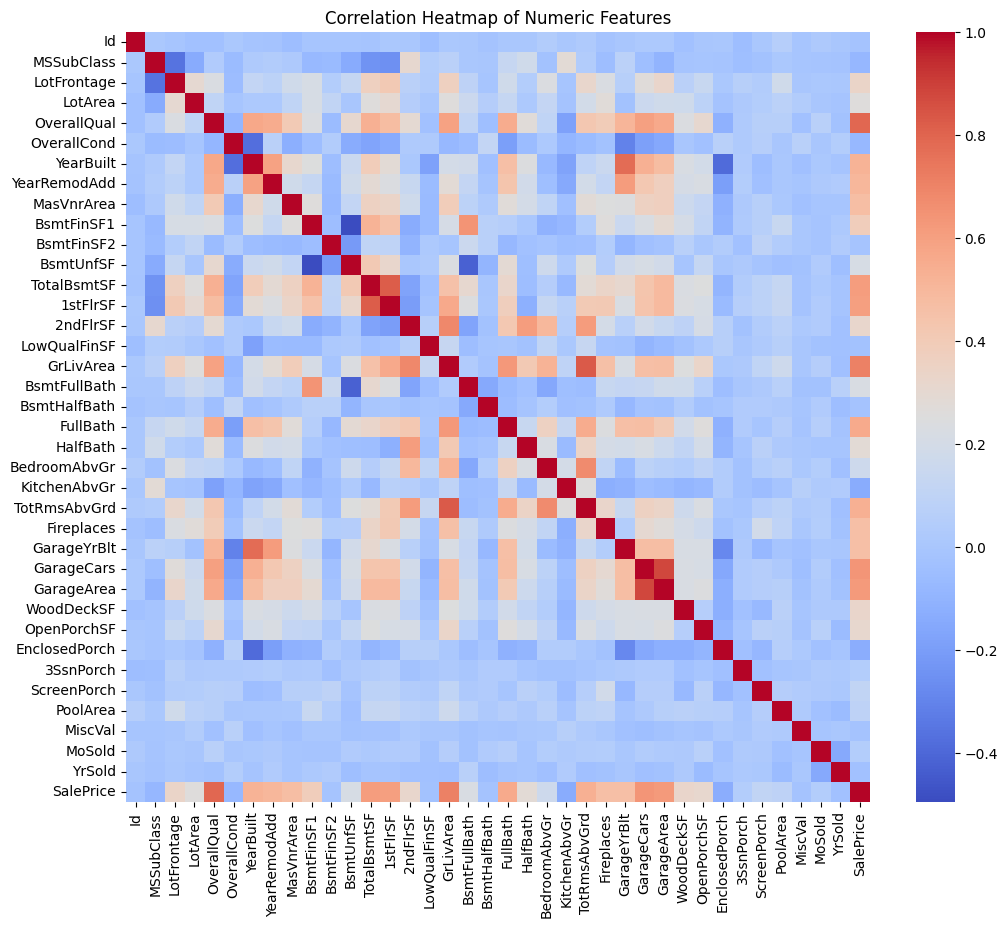

Most Correlated Features: ['OverallQual' 'YearBuilt' 'YearRemodAdd' 'TotalBsmtSF' '1stFlrSF'
 'GrLivArea' 'FullBath' 'TotRmsAbvGrd' 'GarageCars' 'GarageArea'
 'SalePrice']
Random Forest Performance:
MSE: 884782691.8735813, RMSE: 29745.29697067389, R^2: 0.8846486227607195
Gradient Boosting Performance:
MSE: 864627962.7081343, RMSE: 29404.556835771804, R^2: 0.887276246230835


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_data = pd.read_csv('https://raw.githubusercontent.com/narendranathreddy333/NLP-Course/main/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/narendranathreddy333/NLP-Course/main/test.csv')

# Basic EDA - Visualizing the distribution of the target variable
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

# Checking for missing values
missing = train_data.isnull().sum()
missing = missing[missing > 0]
print("Missing values:", missing.sort_values(ascending=False))

# Handling missing values by imputing or dropping them
for col in missing.index:
    if train_data[col].dtype == 'object' or missing[col] > 500:
        train_data[col].fillna('None', inplace=True)
        test_data[col].fillna('None', inplace=True)
    else:
        median_value = train_data[col].median()
        train_data[col].fillna(median_value, inplace=True)
        test_data[col].fillna(median_value, inplace=True)
# Select only numeric columns for correlation
numeric_features = train_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation = numeric_features.corr()

# Continue with the heatmap visualization and further analysis
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

top_corr_features = correlation.index[abs(correlation["SalePrice"]) > 0.5]
print("Most Correlated Features:", top_corr_features.values)

# Selecting features
features = list(top_corr_features.drop('SalePrice'))

# Split the data
X = train_data[features]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training with hyperparameter tuning
param_rf = {'n_estimators': [100, 300], 'max_depth': [10, 15, None]}
param_gb = {'n_estimators': [100, 300], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_rf, cv=3, scoring='neg_mean_squared_error')
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_gb, cv=3, scoring='neg_mean_squared_error')

grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

# Evaluating the models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

print("Random Forest Performance:")
evaluate_model(grid_rf.best_estimator_, X_test, y_test)

print("Gradient Boosting Performance:")
evaluate_model(grid_gb.best_estimator_, X_test, y_test)

# Save predictions if needed
# predictions = grid_rf.best_estimator_.predict(test_data[features])
# test_data['Predicted_SalePrice'] = predictions
# test_data[['Id', 'Predicted_SalePrice']].to_csv('/path/to/save/predictions.csv', index=False)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


Description of DistilBERT:
Original Pretraining Data Sources: DistilBERT was pretrained primarily on the same corpus as BERT, which is the BookCorpus and English Wikipedia.
Number of Parameters: DistilBERT has approximately 66 million parameters, about 40% fewer than BERT's 110 million parameters, making it faster and smaller while achieving similar performance levels.
Task-Specific Fine-Tuning: Although no fine-tuning is required for this assignment, DistilBERT can be fine-tuned on specific NLP tasks. However, for the zero-shot sentiment analysis task, we will use it in a zero-shot learning framework provided by Hugging Face.

In [ ]:
'''


Description of the Pretrained Language Model (PLM)

Model Selected: BART (Bidirectional and Auto-Regressive Transformers) from Facebook, specifically the facebook/bart-large-mnli variant.

Pretraining Data Sources: BART was originally pretrained on a mixture of books, stories, and internet text, covering a broad range of topics and styles. This included data from BookCorpus, CC-News, and stories from the Toronto Book Corpus, among others.

Number of Parameters: The BART-large model has approximately 400 million parameters.

Task-Specific Fine-Tuning: The specific variant used, bart-large-mnli (MultiNLI), was fine-tuned on the Multi-Genre Natural Language Inference (MultiNLI) dataset. This dataset involves sentence pairs annotated with textual entailment information across multiple genres, which trains the model to understand and classify text according to inferred categories, without needing task-specific training.


'''



# Write your code here
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load data
data_path = 'https://raw.githubusercontent.com/narendranathreddy333/NLP-Course/main/imdb_User_reviews_annotated.csv'
data = pd.read_csv(data_path)

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


classes = ['positive', 'negative', 'neutral']
results = data['clean_text'].apply(
    lambda x: classifier(
        x,
        candidate_labels=classes,
        multi_label=False,
        truncation=True,  # Enable truncation
        max_length=512  # Maximum length for BERT models
    )
)


# Extract predicted labels and scores
data['predicted_label'] = results.apply(lambda x: x['labels'][0])
data['scores'] = results.apply(lambda x: x['scores'][0])

# Evaluate performance
accuracy = accuracy_score(data['actual_label'], data['predicted_label'])
precision, recall, f1, _ = precision_recall_fscore_support(data['actual_label'], data['predicted_label'], average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")




'''

Advantages:

Flexibility: BART can handle a wide range of NLP tasks including text generation, comprehension, and classification without task-specific adjustments.
Robustness: It is pretrained on diverse data sources, making it effective across different contexts and genres.
Performance: The model generally achieves high scores across multiple NLP benchmarks, indicating strong general capabilities.
Disadvantages:

Resource Intensity: With a large number of parameters, BART requires significant computational resources, which can limit accessibility for individuals or organizations with less powerful hardware.
Complexity: While the model's versatility is a strength, it also means that it can be less optimized for specific tasks compared to models fine-tuned for particular applications.
Truncation Requirement: Due to its fixed input size, longer texts need to be truncated, which might result in losing important contextual information for making predictions.
Challenges Encountered:

Handling Large Inputs: Truncation was necessary to process longer reviews, which might have led to a loss of critical sentiment cues.
Computational Demand: Running the model, especially multiple times for a dataset, required significant computation, possibly leading to long processing times or requiring high-performance computing resources.

'''